# Restart

벽에 부딪혀 있습니다. 어떠한 파생변수를 만들어도 성능이 늘지 않는 상황입니다.<br>
처음부터 다시 시작해보아야겠습니다.

In [1]:
import load_dtypes as ld
import warnings
warnings.filterwarnings(action='ignore')
import os, sys

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

In [2]:
TRAIN_PATH = r'C:\Users\Wyatt\wyatt37\Data\solarpanel\train\train.csv'
TEST_PATH = r'C:\Users\Wyatt\wyatt37\Data\solarpanel\test'
SUBMISSION_PATH = r'C:\Users\Wyatt\wyatt37\Data\solarpanel\sample_submission.csv'

In [3]:
train = ld.load_dtypes(TRAIN_PATH)
train.info()
submission = pd.read_csv(SUBMISSION_PATH)

C:\Users\Wyatt\wyatt37\Data\solarpanel\train\train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int16  
 1   Hour    52560 non-null  int8   
 2   Minute  52560 non-null  int8   
 3   DHI     52560 non-null  int16  
 4   DNI     52560 non-null  int16  
 5   WS      52560 non-null  float32
 6   RH      52560 non-null  float32
 7   T       52560 non-null  int8   
 8   TARGET  52560 non-null  float32
dtypes: float32(3), int16(3), int8(3)
memory usage: 1.1 MB


In [4]:
# hour와 minute을 합쳐주는 함수입니다.
def sum_hour_minute(train):
    # 0과 30으로 되어 있는 minute을 0과 0.5로 바꿉니다.
    train.Minute = round(train.Minute * 0.017, 1)
    # hour에 minute을 더해줍니다.
    train.Hour = train.Hour + train.Minute
    
    return train

In [5]:
train = sum_hour_minute(train)

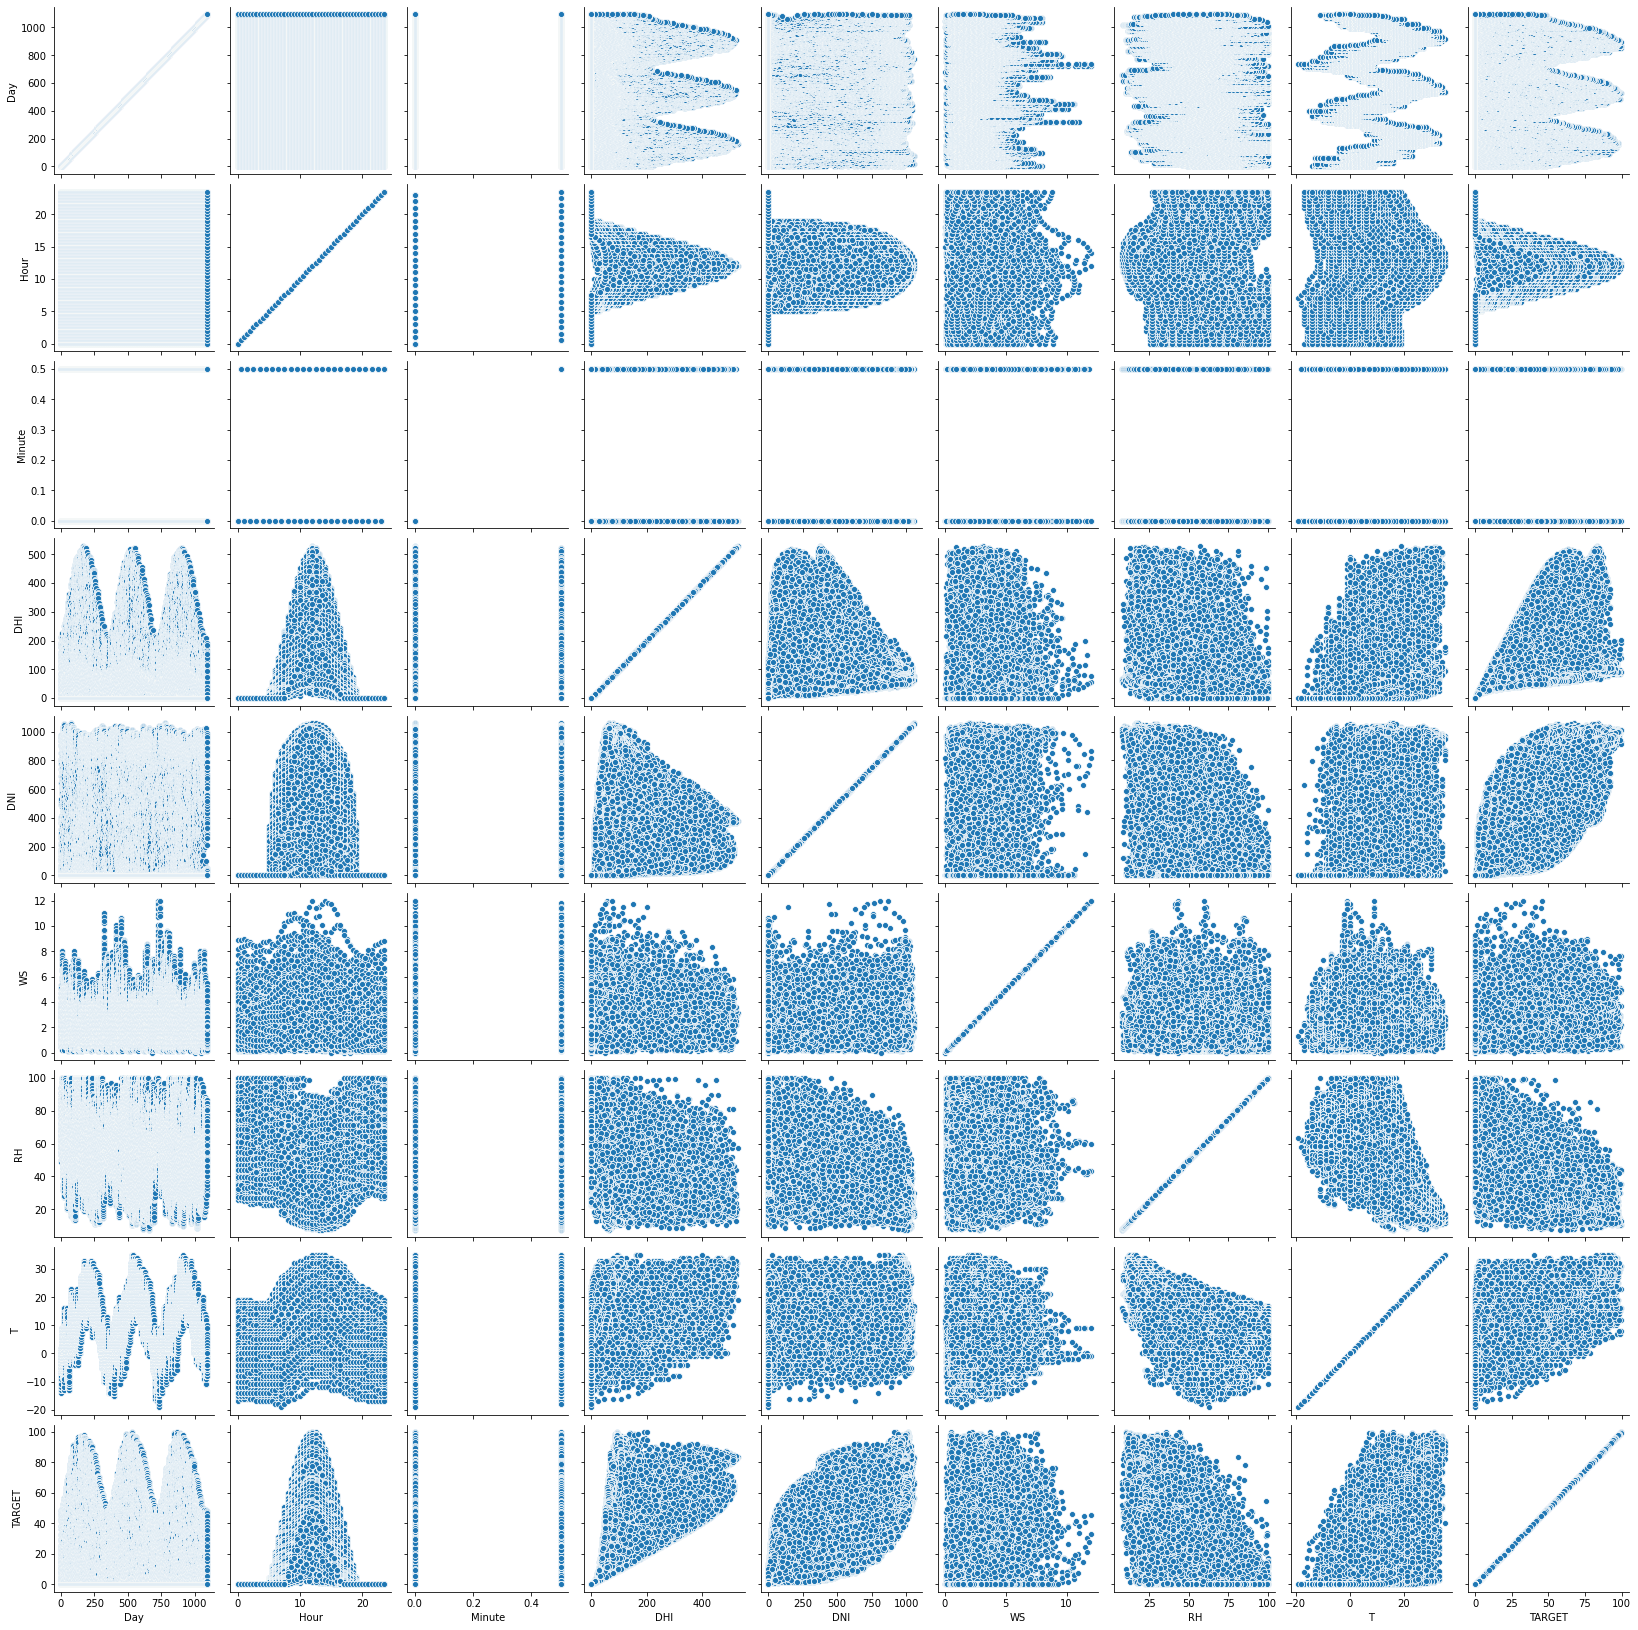

In [9]:
g = sns.PairGrid(train)
g.map(sns.scatterplot)
plt.show()

In [10]:
train

Day  Hour  Minute  DHI  DNI   WS         RH   T  TARGET
0         0   0.0     0.0    0    0  1.5  69.080002 -12     0.0
1         0   0.5     0.5    0    0  1.5  69.059998 -12     0.0
2         0   1.0     0.0    0    0  1.6  71.779999 -12     0.0
3         0   1.5     0.5    0    0  1.6  71.750000 -12     0.0
4         0   2.0     0.0    0    0  1.6  75.199997 -12     0.0
...     ...   ...     ...  ...  ...  ...        ...  ..     ...
52555  1094  21.5     0.5    0    0  2.4  70.699997  -4     0.0
52556  1094  22.0     0.0    0    0  2.4  66.790001  -4     0.0
52557  1094  22.5     0.5    0    0  2.2  66.779999  -4     0.0
52558  1094  23.0     0.0    0    0  2.1  67.720001  -4     0.0
52559  1094  23.5     0.5    0    0  2.1  67.699997  -4     0.0

[52560 rows x 9 columns]

In [37]:
for i in range(5):
    globals()['test_{}'.format(i)] = pd.read_csv(TEST_PATH + '/{}.csv'.format(i))

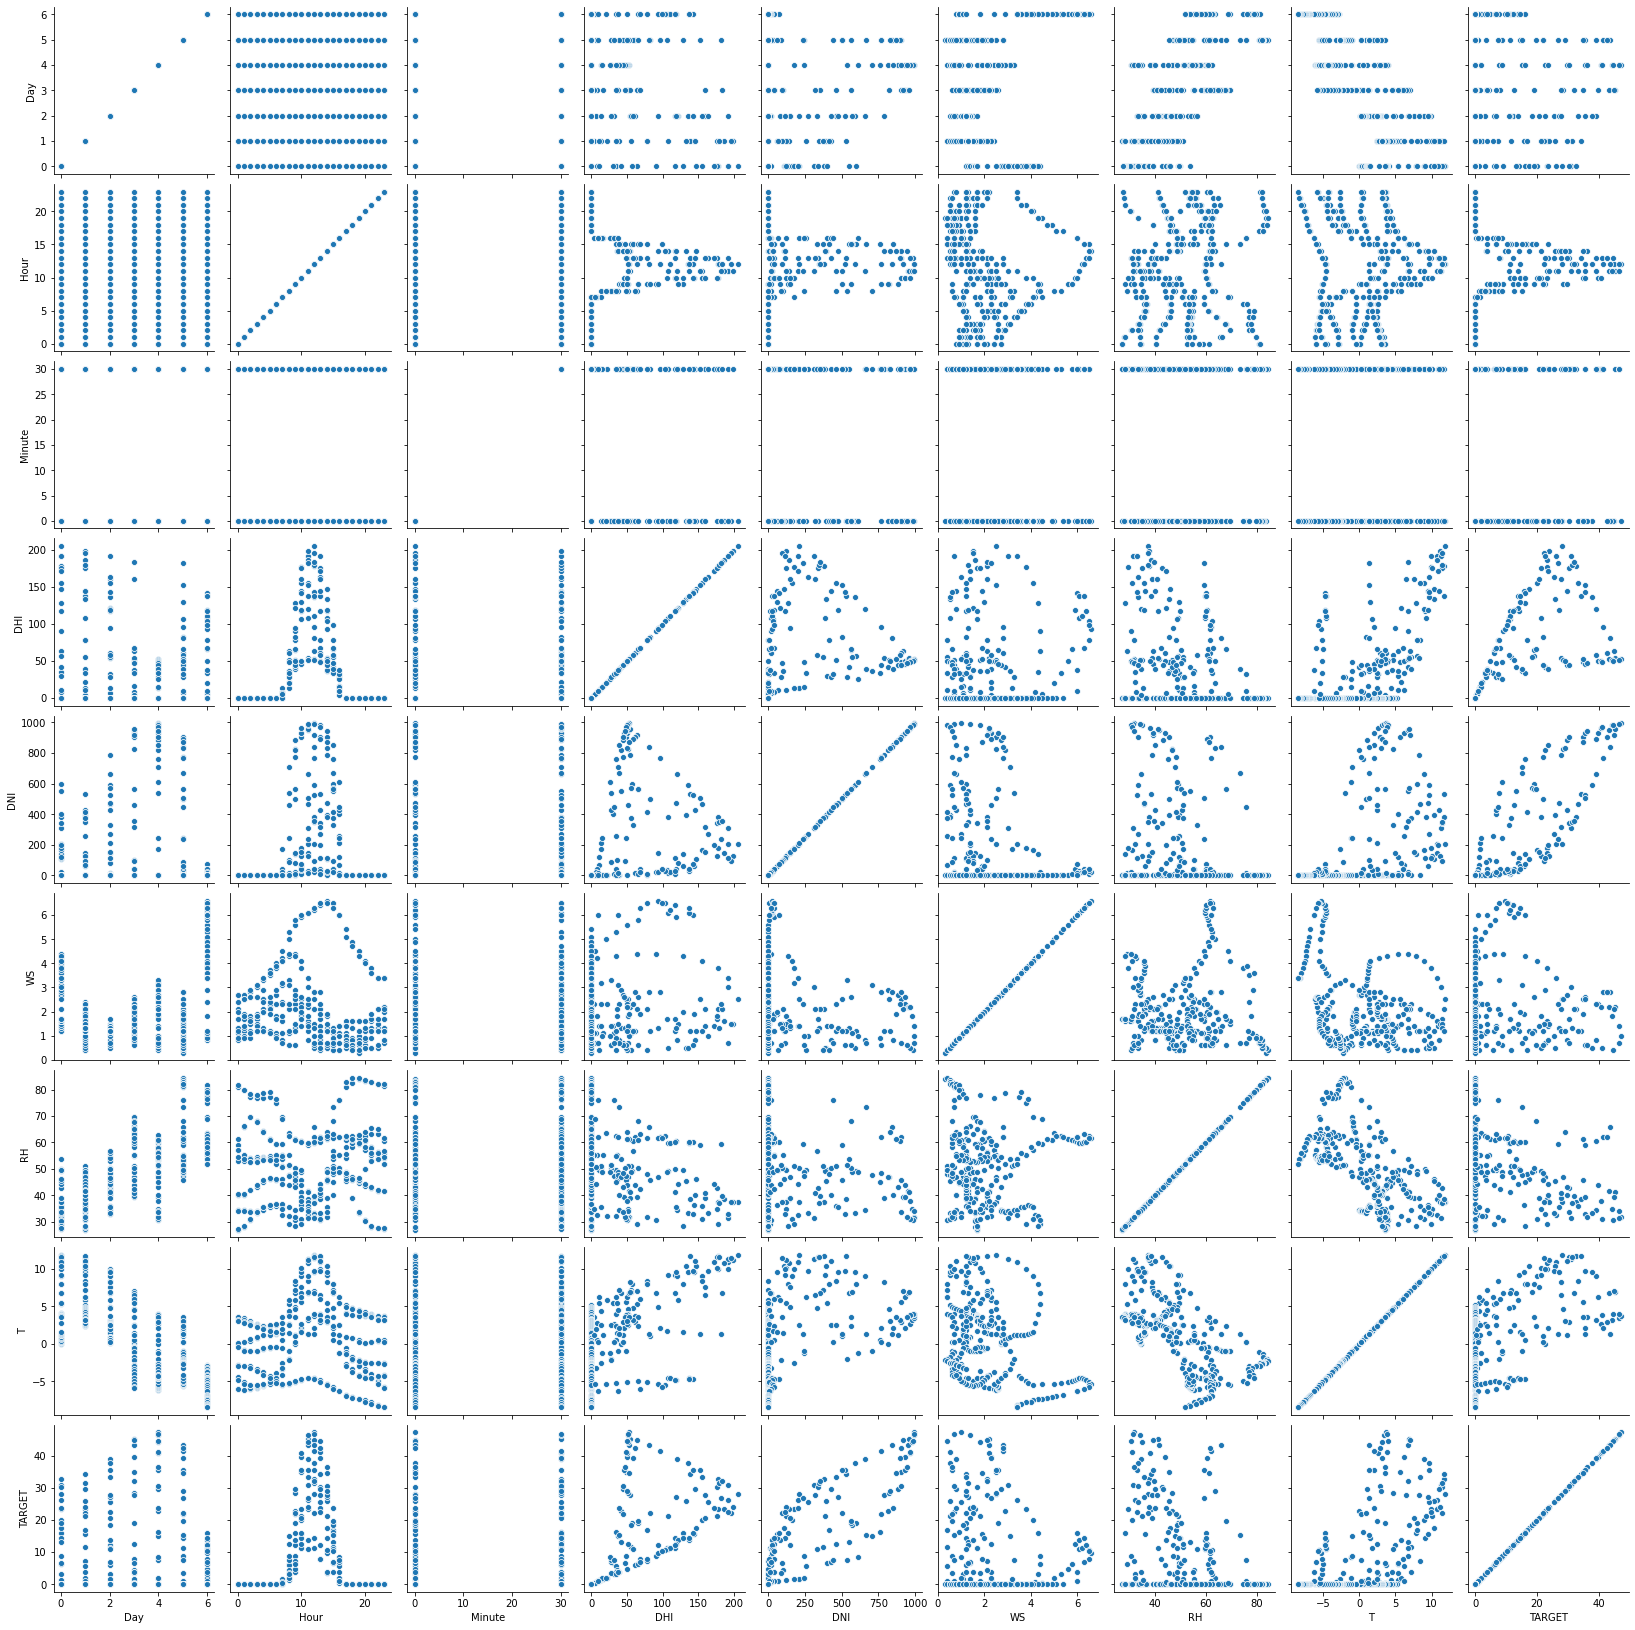

In [14]:
g = sns.PairGrid(test_0)
g.map(sns.scatterplot)
plt.show()

In [19]:
class HiddenPrints: # print를 막아주는 클래스 입니다.
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
        
with HiddenPrints():
    df_test = []

    for i in range(81):
        file_path = TEST_PATH + '/' + str(i) + '.csv'
        temp = pd.read_csv(file_path)
        temp = sum_hour_minute(temp)
        #temp = make_features(temp)
        #temp = shift_columns(temp, shifted_columns, lags).dropna()[-48:]
        df_test.append(temp)

    X_test = pd.concat(df_test)
print(X_test.shape)

(27216, 9)


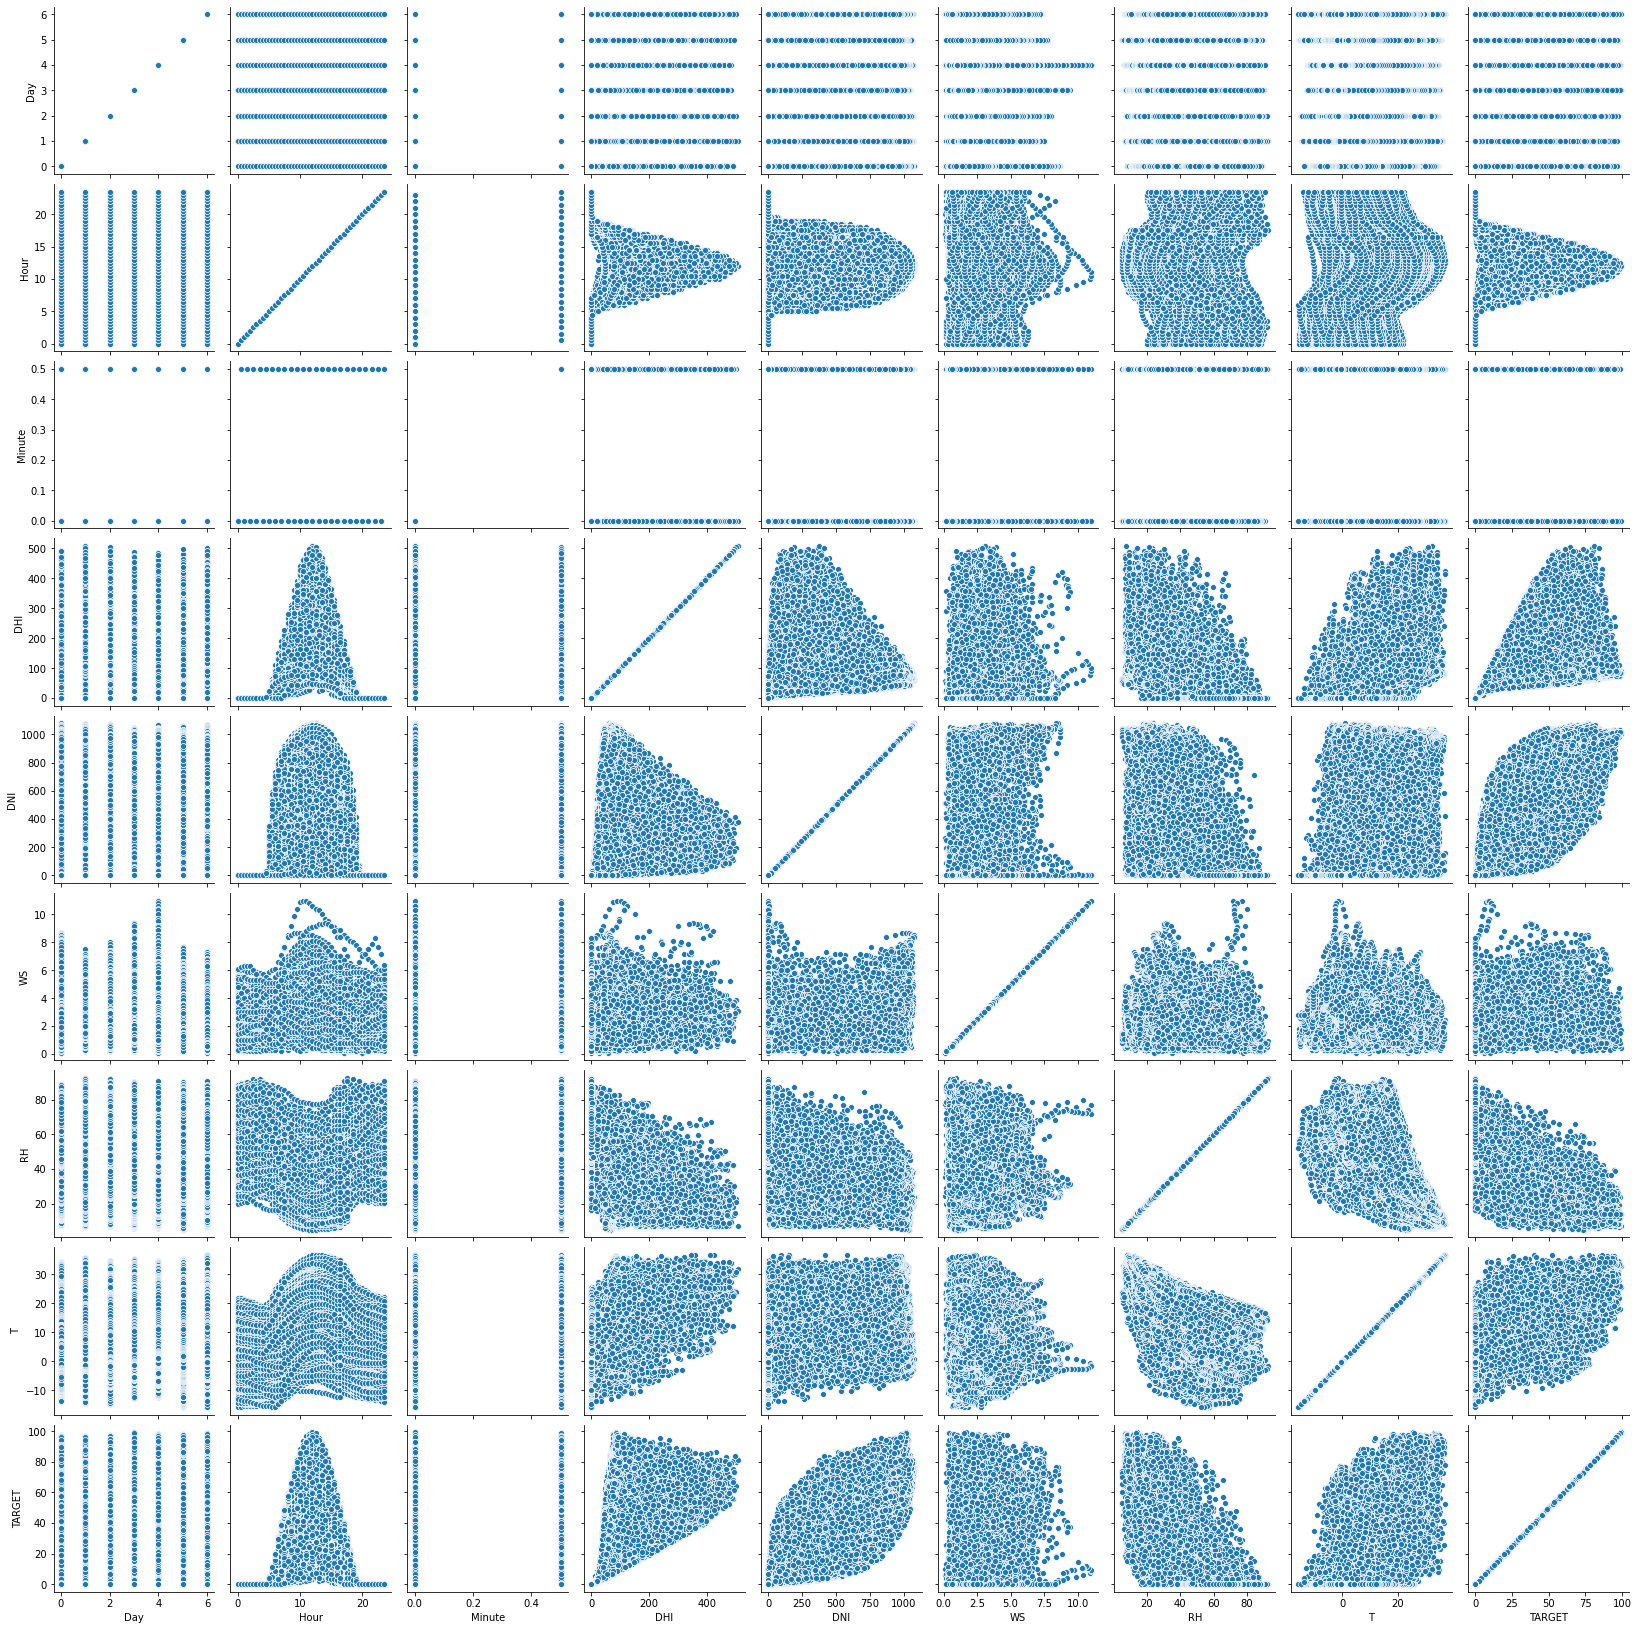

In [21]:
g = sns.PairGrid(X_test)
g.map(sns.scatterplot)
plt.show()

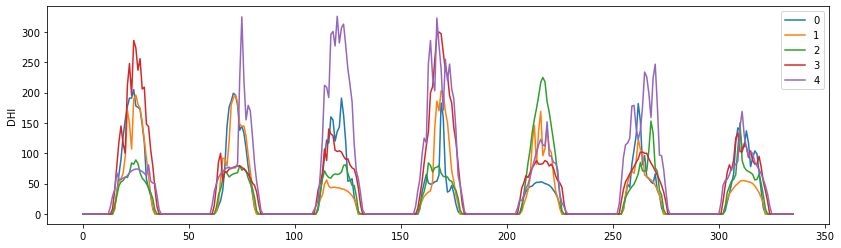

In [65]:
plt.figure(figsize=(14, 4))
test_0.DHI.plot()
test_1.DHI.plot()
test_2.DHI.plot()
test_3.DHI.plot()
test_4.DHI.plot()
plt.legend(['0', '1','2','3','4'], loc='upper right')
plt.ylabel('DHI')
plt.show()

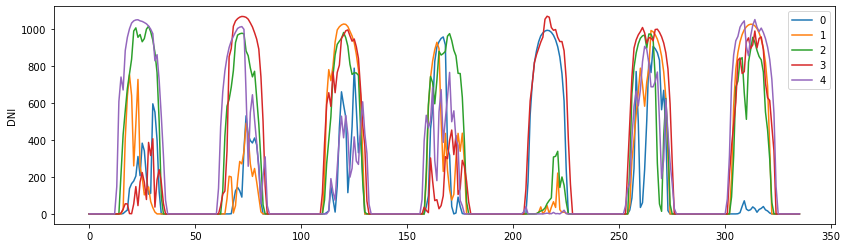

In [66]:
plt.figure(figsize=(14, 4))
test_0.DNI.plot()
test_1.DNI.plot()
test_2.DNI.plot()
test_3.DNI.plot()
test_4.DNI.plot()
plt.legend(['0', '1','2','3','4'], loc='upper right')
plt.ylabel('DNI')
plt.show()

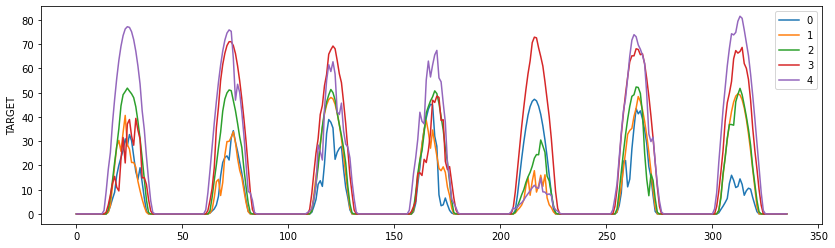

In [67]:
plt.figure(figsize=(14, 4))
test_0.TARGET.plot()
test_1.TARGET.plot()
test_2.TARGET.plot()
test_3.TARGET.plot()
test_4.TARGET.plot()
plt.legend(['0','1','2','3','4'], loc='upper right')
plt.ylabel('TARGET')
plt.show()

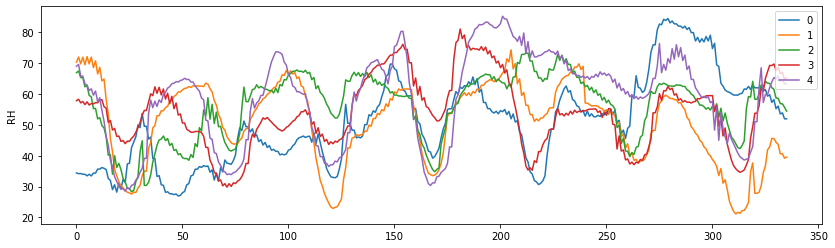

In [68]:
plt.figure(figsize=(14, 4))
test_0.RH.plot()
test_1.RH.plot()
test_2.RH.plot()
test_3.RH.plot()
test_4.RH.plot()
plt.legend(['0','1','2','3','4'], loc='upper right')
plt.ylabel('RH')
plt.show()

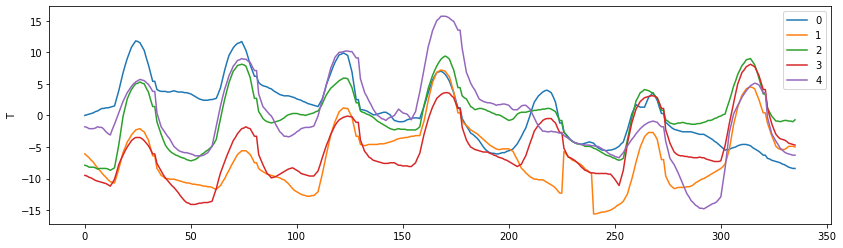

In [69]:
plt.figure(figsize=(14, 4))
test_0['T'].plot()
test_1['T'].plot()
test_2['T'].plot()
test_3['T'].plot()
test_4['T'].plot()
plt.legend(['0','1','2','3','4'], loc='upper right')
plt.ylabel('T')
plt.show()